# LIBROSA

### IMPORTS
The last import is the whole reason for using jupyter notebook over regular python. The audio widget is built for this.

In [114]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import librosa
import soundfile as sf
from IPython.display import Audio

### DEFAULTS
*root* : folder containing all audio files<br>
*beat_path* : output folder for CSV files containing beat timestamps<br>
*audio_path* : for clips fetched from full songs<br>
*spect_path* : spectrograms saved as PNG files

In [152]:
root = r"C:\Users\david\OneDrive\Documents\DTU\S1\Introduktion til Intelligente Systemer\Eksamensprojekt\RawData"

beat_path = r"C:\Users\david\OneDrive\Documents\DTU\S1\Introduktion til Intelligente Systemer\Eksamensprojekt\DataBeat"

audio_path = r"C:\Users\david\OneDrive\Documents\DTU\S1\Introduktion til Intelligente Systemer\Eksamensprojekt\DataWav"

spect_path = r"C:\Users\david\OneDrive\Documents\DTU\S1\Introduktion til Intelligente Systemer\Eksamensprojekt\VisualSpectrogram"

PLOT = True
LISTEN = True
CSV = False

SAVE_TEST = False

### TEST
To be run on a single file at the time for proof of concept.

In [153]:
name = "1983-0.flac"
filepath = root + "\\" + name
sample_length = 20

# Load audio file of sample_length seconds
y, sr = librosa.load(filepath, offset=0, duration=sample_length)
if sample_length is None:
    sample_length = librosa.get_duration(y=y, sr=sr)

# Running default librosa beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# Convert beat_frames to timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)


Function converting beat times from seconds to milliseconds and saving it as a CSV file.

In [163]:
def millisecond_list(SHOW=True, SAVE=False, NAME=name):
    # Convert beat times to python list of integers in milliseconds
    beat_times_ms = (beat_times * 1000).astype(int).tolist()
    if SHOW:
        print(beat_times_ms)

    if SAVE:
        # Save beat times to CSV file
        csv_file = beat_path + "\\" + NAME[:NAME.rindex(".")] + ".csv"
        with open(csv_file, "w") as output:
            output.write(str(beat_times_ms))

Function creating a spectrogram using FFT, plotting it along with beat lines and saving it as a PNG.

In [164]:
def plot_spectrogram(SHOW=True, SAVE=False, NAME=name):
    # Making Fourier Transform for spectrogram
    D = librosa.stft(y)

    # Converting to decibel for plotting
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Plotting spectrogram with lines at beat times
    plt.figure()
    librosa.display.specshow(S_db)
    plt.set_cmap(col.LinearSegmentedColormap.from_list("", ["black", "red"]))
    for time in beat_times:
        plt.axvline(x=time * (len(D[0]) / sample_length), color="yellow", ymax=0.4)
    
    if SHOW:
        plt.show()

    if SAVE:
        # Save spectrogram to PNG file
        png_file = spect_path + "\\" + NAME[:NAME.rindex(".")] + ".png"
        plt.savefig(png_file)
    

Function mixing the original audio clip with beat markings and saving it as a FLAC file.

In [165]:
def listen_to_beats(SHOW=True, SAVE=False, NAME=name):
    # Sonify beat times as clicks
    y_clicks = librosa.clicks(times=beat_times, length=len(y), sr=sr)

    # Audio widget for listening to sample and beats
    if SHOW:
        display(Audio(data=y+y_clicks, rate=sr))

    if SAVE:
        # Save audio file of sample and beats
        audio_file = audio_path + "\\" + NAME[:NAME.rindex(".")] + ".flac"
        sf.write(audio_file, y+y_clicks, sr)

Logic running relevant functions defined by settings further up in the document.

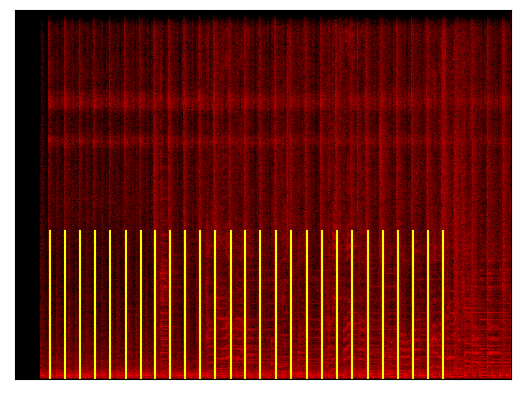

In [141]:
if CSV:
    millisecond_list(SAVE=SAVE_TEST)

if PLOT:
    plot_spectrogram(SAVE=SAVE_TEST)

if LISTEN:
    listen_to_beats(SAVE=SAVE_TEST)

### DATA GENERATION
Loop meant to be used for generating data files from multiple audio inputs.

In [166]:
# List of all audio files in FixData directory
file_list = os.listdir(root)

for song in file_list:
    # Generating beat times for each song
    filepath = root + "\\" + song
    y, sr = librosa.load(filepath)
    sample_length = librosa.get_duration(y=y, sr=sr)
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)

    millisecond_list(SHOW=False, SAVE=True, NAME=song)
    # plot_spectrogram(SHOW=False, SAVE=True, NAME=song)
    # listen_to_beats(SHOW=False, SAVE=True, NAME=song)